## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Import the dataset

In [4]:
dataset = pd.read_csv("House_Rent_Dataset.csv")

## Dataset Preprocessing

### Converting "Posted On" to datetime formart

In [7]:
dataset['Posted On'] = pd.to_datetime(dataset['Posted On'], format='%d/%m/%Y')

### Split "Floor" into "Current Floor" and "Total Floors" as numeric columns.

In [9]:
# Extracting numeric values from the "Floor" column
floor_split = dataset["Floor"].str.extract(r'(?P<Current_Floor>\d+|Ground)\s+out of\s+(?P<Total_Floors>\d+)', expand=True)

# Replace "Ground" with 0 for numerical representation
floor_split['Current_Floor'] = floor_split['Current_Floor'].replace('Ground', 0).astype(float)
floor_split['Total_Floors'] = floor_split['Total_Floors'].astype(float)

# Add the new columns to the dataset and drop the original "Floor" column
dataset = dataset.join(floor_split).drop(columns=['Floor'])

dataset

,Posted On,Rent,BHK,Bathroom,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact,Current_Floor,Total_Floors
0,2022-05-18,10000,2,2,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,0.0,2.0
1,2022-05-13,20000,2,1,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,1.0,3.0
2,2022-05-16,17000,2,1,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,1.0,3.0
3,2022-07-04,10000,2,1,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,1.0,2.0
4,2022-05-09,7500,2,1,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,15000,2,2,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner,3.0,5.0
4742,2022-05-15,29000,3,3,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner,1.0,4.0
4743,2022-07-10,35000,3,3,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent,3.0,5.0
4744,2022-07-06,45000,3,2,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent,23.0,34.0


### Check for duplicates or outliers in key columns

In [34]:
duplicate = dataset.duplicated().sum()
duplicate, dataset['Rent'].describe()

(0,
 count    4.746000e+03
 mean     3.499345e+04
 std      7.810641e+04
 min      1.200000e+03
 25%      1.000000e+04
 50%      1.600000e+04
 75%      3.300000e+04
 max      3.500000e+06
 Name: Rent, dtype: float64)

### Encoding Binary Categorical data

In [13]:
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
unique_values = {col:dataset[col].unique() for col in categorical_features}
unique_values

{'Area Type': array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object),
 'City': array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
       dtype=object),
 'Furnishing Status': array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object),
 'Tenant Preferred': array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object),
 'Point of Contact': array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)}

### Exploratory Data Analysis 

In [36]:
#Descriptive statistics for numerical columns
numerical_columns = ['Rent', 'BHK', 'Bathroom', 'Size', 'Current_Floor', 'Total_Floors']
numerical_stats = dataset[numerical_columns].describe()
print(numerical_stats)

               Rent          BHK     Bathroom         Size  Current_Floor  \
count  4.746000e+03  4746.000000  4746.000000  4746.000000    4708.000000   
mean   3.499345e+04     2.083860     1.965866   967.490729       3.472387   
std    7.810641e+04     0.832256     0.884532   634.202328       5.782390   
min    1.200000e+03     1.000000     1.000000    10.000000       0.000000   
25%    1.000000e+04     2.000000     1.000000   550.000000       1.000000   
50%    1.600000e+04     2.000000     2.000000   850.000000       2.000000   
75%    3.300000e+04     3.000000     2.000000  1200.000000       3.000000   
max    3.500000e+06     6.000000    10.000000  8000.000000      76.000000   

       Total_Floors  
count   4708.000000  
mean       6.954121  
std        9.464211  
min        1.000000  
25%        2.000000  
50%        4.000000  
75%        6.000000  
max       89.000000  


### Distribution of Rent and Size

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


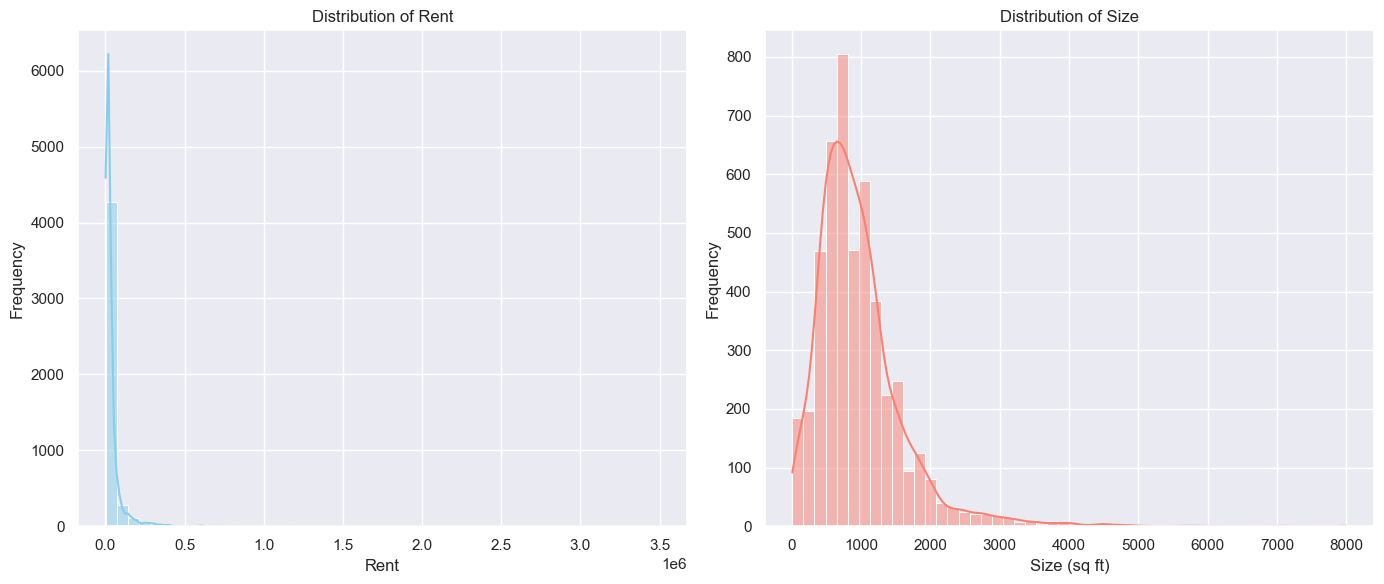

In [17]:
plt.figure(figsize=(14, 6))

# Rent Distribution
plt.subplot(1, 2, 1)
sns.histplot(dataset['Rent'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')

# Size Distribution
plt.subplot(1, 2, 2)
sns.histplot(dataset['Size'], kde=True, bins=50, color='salmon')
plt.title('Distribution of Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Count plots for categorical variables

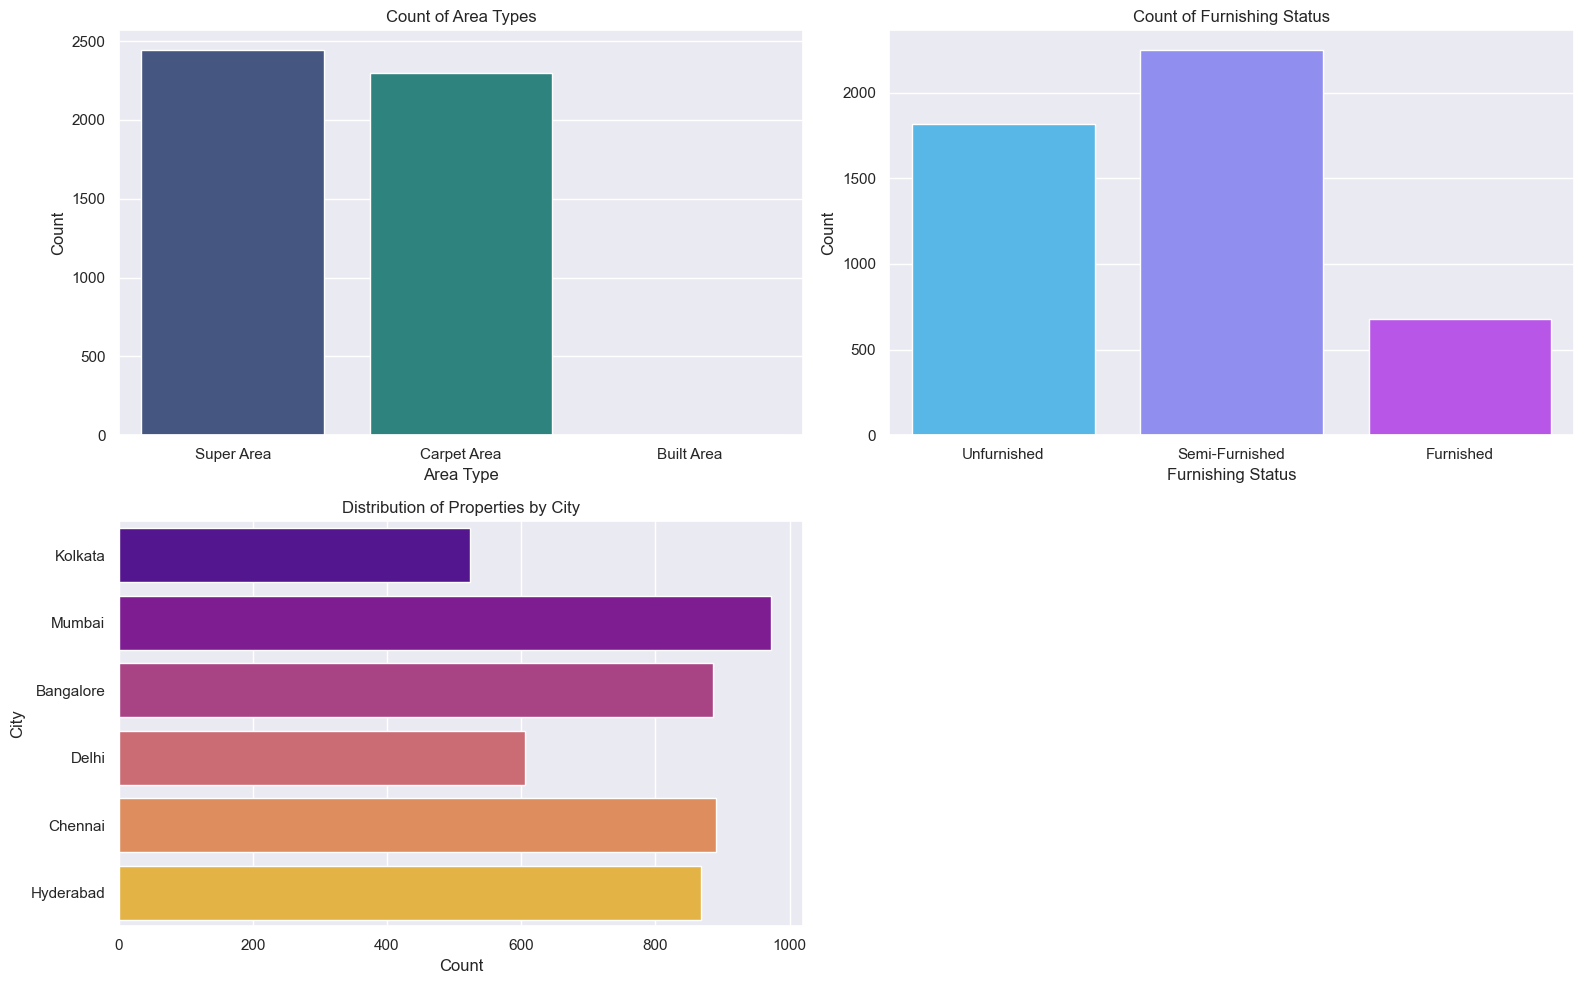

In [19]:
plt.figure(figsize=(16, 10))

# Area Type
plt.subplot(2, 2, 1)
sns.countplot(x='Area Type', data=dataset, palette='viridis')
plt.title('Count of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Count')

# Furnishing Status
plt.subplot(2, 2, 2)
sns.countplot(x='Furnishing Status', data=dataset, palette='cool')
plt.title('Count of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')

# City Distribution
plt.subplot(2, 2, 3)
sns.countplot(y='City', data=dataset, palette='plasma')
plt.title('Distribution of Properties by City')
plt.xlabel('Count')
plt.ylabel('City')

plt.tight_layout()
plt.show()

### Encoding categorical data

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Identifying features and target
target = 'Rent'
categorical_features = ['Area Type', 'Furnishing Status', 'Tenant Preferred', 'City']
numerical_features = ['Size', 'BHK', 'Bathroom']

# Separate features and target
X = dataset[categorical_features + numerical_features]
y = dataset[target]

# One-Hot Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

### Split dataset to train and test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

# Apply transformations to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(X_train_processed.shape, X_test_processed.shape, y_train.shape, y_test.shape)

(3322, 14) (1424, 14) (3322,) (1424,)


### Training the Multiple Linear Regression Model on  train set

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor

regressor = LinearRegression()
regressor.fit(X_train_processed, y_train) 

LinearRegression()

### Predicting Result

In [41]:
y_pred = regressor.predict(X_test_processed)

### Evaluating the Model

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae, rmse, r2

evaluation_comparison = pd.DataFrame({
    "Original Pice": y_test,
    "Predicted Price": y_pred
})

comparison_table = pd.DataFrame(list(predictions.items()), columns=['Model', 'Predicted Rent'])


(22353.543083869336, 40333.92722441404, 0.5377480655919794)

### Comparing the Original and Predicted Price

In [54]:
y_pred = [f"{val:.0f}" for val in y_pred]
comparison_df = pd.DataFrame({
    "Original Pice": y_test,
    "Predicted Price": y_pred
})

comparison_df.head(50)

,Original Pice,Predicted Price
1566,16000,30896
3159,12000,18477
538,28000,67717
2630,8000,75666
4418,46000,89673
4679,17000,15613
1181,57000,82395
1957,9500,15140
1344,400000,183739
3410,15000,4445
